In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
def x(sigma, int_rate, r, pi_e):
    """
    Calculate output gap
    """
    return - sigma * (int_rate - r - pi_e)
    
def pi_exp(pi_lag, model="adaptive"):
    """
    Calculate expected inflation

    TODO: Implement rational expectations
    """
    if model == "adaptive":
        return pi_lag[-1]

def pi(pi_e, kappa, x):
    """
    Calculate inflation
    """
    return pi_e + kappa * x

def u(output_gap):
    return 4 - 0.5 * output_gap

def simulate(
        output_gap_init=[0], 
        inflation_init=[5.5], 
        policy_path=[0, 1.9, 2.8, 2.8, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4], 
        nat_rate=2, 
        sigma=0.71, 
        kappa=0.55, 
        periods=10,
        model="adaptive"
    ):
    """
    Simulate output gap, unemployment, and inflation using supplied policy path.

    Default parameters correspond to Cochrane's adaptive expectations model.
    """
    output_gap = output_gap_init.copy()
    inflation = inflation_init.copy()
    inflation_e = inflation_init.copy()
    interest_rate = policy_path.copy()
    r = nat_rate
    sigma = sigma
    kappa = kappa
    model = model
    T = periods

    for t in range(1, T):
        inflation_e.append(pi_exp(
            inflation, 
            model
        ))

        output_gap.append(x(
            sigma, 
            interest_rate[t], 
            r, 
            inflation_e[-1]
        ))

        inflation.append(pi(
            inflation_e[-1], 
            kappa, 
            output_gap[t]
        ))

    unemployment = [u(gap) for gap in output_gap]

    data = pd.DataFrame({
        "year": [2021 + i for i in range(T)],
        "output_gap": output_gap,
        "inflation": inflation,
        "unemployment": unemployment,
        "fed_funds": interest_rate[:len(output_gap)]
    })

    print(data)

    data.plot(
        x="year", 
        y=["fed_funds", "inflation", "unemployment"], 
        label=["Fed funds", "Inflation", "Unemployment"], 
        ylim=(-2, 12)
    )
    
    plt.show()

    return

   year  output_gap  inflation  unemployment  fed_funds
0  2021    0.000000   5.500000      4.000000        0.0
1  2022    3.976000   7.686800      2.012000        1.9
2  2023    4.889628  10.376095      1.555186        2.8
3  2024    6.799028  14.115561      0.600486        2.8
4  2025    9.738048  19.471487     -0.869024        2.4
5  2026   13.540756  26.918903     -2.770378        2.4
6  2027   18.828421  37.274534     -5.414210        2.4
7  2028   26.180919  51.674040     -9.090460        2.4
8  2029   36.404568  71.696553    -14.202284        2.4
9  2030   50.620552  99.537856    -21.310276        2.4


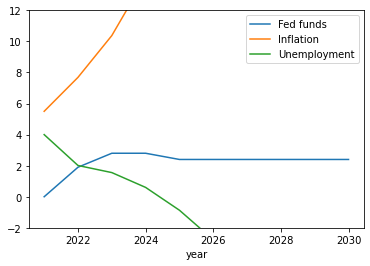

In [29]:
simulate()